<a href="https://colab.research.google.com/github/zrosen3/Colombian-peso-counterfeit-detection/blob/main/Code/log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [8]:
#Set up google colab working environment
%cd /content/
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21207, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 21207 (delta 143), reused 220 (delta 125), pack-reused 20965
Receiving objects: 100% (21207/21207), 440.82 MiB | 30.55 MiB/s, done.
Resolving deltas: 100% (237/237), done.
Updating files: 100% (62417/62417), done.
/content/Colombian-peso-counterfeit-detection/Code


In [9]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf


#Load in data

In [3]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run logistic regression model

In [4]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(
                units = 13,
               activation = "softmax"
        )])
        
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5)

Epoch 1/5
390/390 [==============================] - 223s 569ms/step - loss: 36.6710 - accuracy: 0.5278 - val_loss: 11.5899 - val_accuracy: 0.6656
Epoch 2/5
390/390 [==============================] - 204s 521ms/step - loss: 11.4981 - accuracy: 0.7433 - val_loss: 8.7167 - val_accuracy: 0.7719
Epoch 3/5
390/390 [==============================] - 226s 577ms/step - loss: 12.6132 - accuracy: 0.7803 - val_loss: 5.1338 - val_accuracy: 0.8322
Epoch 4/5
390/390 [==============================] - 194s 495ms/step - loss: 7.1891 - accuracy: 0.8496 - val_loss: 1.7117 - val_accuracy: 0.9464
Epoch 5/5
390/390 [==============================] - 185s 473ms/step - loss: 7.3662 - accuracy: 0.8607 - val_loss: 2.1488 - val_accuracy: 0.9380


## Inspect model performance

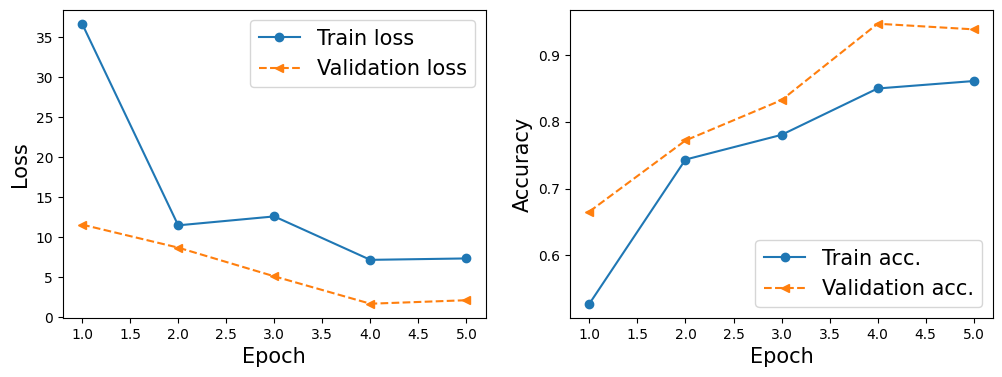

130/130 - 24s - loss: 1.6670 - accuracy: 0.9409 - 24s/epoch - 183ms/step
Test loss: 1.6670314073562622 | Test accuracy: 0.9408653974533081


(0.860725998878479, 0.9379807710647583, 0.9408653974533081)

In [5]:
cf.EvaluateModel(model, test_ds, history)

In [11]:
y_pred_probs, y_test, y_pred = cf.ExtractPredictions(model, test_ds)
cf.PrecisionRecallScores(y_test, y_pred) 
cf.ConfusionMatrix(class_names, y_test, y_pred)
cf.individual_ROCs(y_pred_probs, y_test, y_pred)
cf.macro_averaged_ROC(y_pred_probs, y_test, y_pred)

130/130 [==============================] - 24s 177ms/step
Macro averaged precision score: 0.07897251643519235
Macro averaged recall score: 0.07908653846153847
Macro averaged F1 score: 0.07879179154614678


TypeError: ignored